In [1]:
using DispersionCurves
using LaTeXStrings
using CSV, DataFrames
include("plotting.jl")

plot_disp (generic function with 1 method)

We wish to find roots of a dispersion function $D(\omega, \beta) = 0$, which is defined in terms of the plasma dispersion function $Z(\zeta)$. This function is provided by the `DispersionCurves` package.

In [2]:
# Parameters which correspond to left-hand side of fig. 2 of https://doi.org/10.1063/1.4942788
μ     = 1/3670.5      # Electron to ion mass-ratio
kperp = 2E-4          # Perpendicular (to the background magnetic field) component of wavenvector
β0    = 0.1             

D(ω, β) = kperp^2 - 2(β * ω^2 - μ) * (1 + ω * Z(ω))

D (generic function with 1 method)

Before we can compute the curve $(\omega(\beta), \beta)$ for which $D(\omega(\beta), \beta) = 0$, we must find a starting point, which we denote by $(\omega_0, \beta_0)$. To this end we define a box with corners $z_0, z_1 \in \mathbb{C}$, and use contour integration to find all of the roots.

ω0 = 0.052 - 1.8e-7im with D(ω0, β0) = 1.2e-17


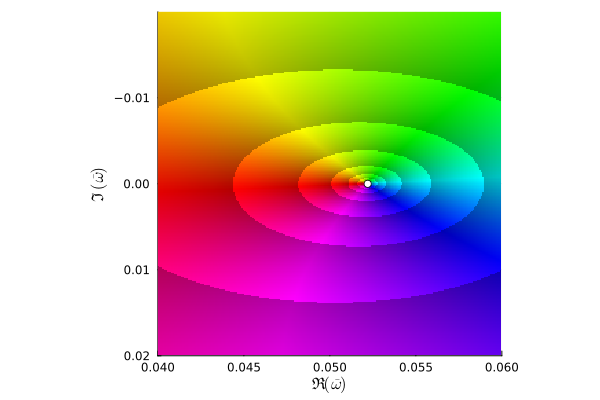

In [3]:
z0 = 0.04 - 2E-2im
z1 = 0.06 + 2E-2im

ω0s = find_zeros(z -> D(z, β0), z0, z1)
ω0s[1], ~ = DispersionCurves.newton(z -> D(z, β0), ω0s[1]; tol=eps())
for ω0 ∈ ω0s
  # Print the root, as well as its function value
  println("ω0 = $(round(ω0, sigdigits=2)) with D(ω0, β0) = $(round(abs(D(ω0, β0)), sigdigits=2))")
end

# Plot the dispersion function D as function of ω inside the box defined by z0, z1
plot_disp(z -> D(z, β0), z0, z1, n=250, roots=ω0s)

For each pair $(\omega_0, \beta_0)$ we now continue the solution until we reach $\beta_1$, and plot the resulting dispersion curves. Here we also have a reference solution obtained from https://doi.org/10.1063/1.4942788.

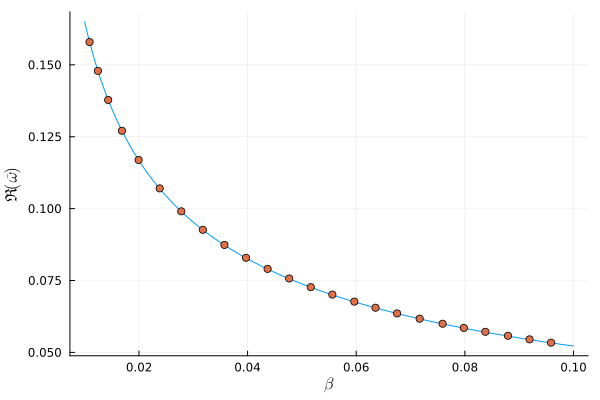

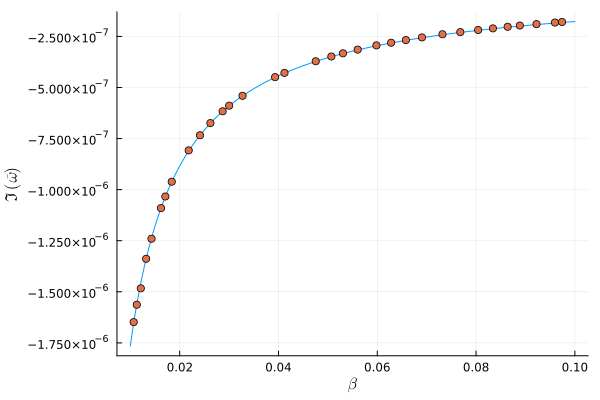

In [4]:
β1    = 0.01 

# Initialize the plots
plt_re = plot(legend=false, xlabel=L"\beta", ylabel=L"\Re(\bar\omega)")
plt_im = plot(legend=false, xlabel=L"\beta", ylabel=L"\Im(\bar\omega)")
for ω0 ∈ ω0s
    ωs, ks = continue_zero(D, ω0, β0, β1, steps=200, tol=10eps())

  plot!(plt_re, ks, real(ωs))
  plot!(plt_im, ks, imag(ωs))
end

# Compare to a reference solution from the previously mentioned paper
ref_re = CSV.read("data/Kleiber_PoP2016_fig2a.csv", DataFrame)
ref_im = CSV.read("data/Kleiber_PoP2016_fig2c.csv", DataFrame)

# NOTE: A factor √2 must be added for the real part as there was a normalisation error in the reference data
scatter!(plt_re, ref_re[1:2:end, 1], ref_re[1:2:end, 2]/√2)
scatter!(plt_im, ref_im[!, 1], ref_im[!, 2])

display(plt_re)
display(plt_im)